> **IMPORTANT**: Before running this notebook, ensure you have ran:
> ```bash
> python ./scripts/preprocessing/preprocess_data.py
> ``` 
> You will know if you ran this if you see a `pickled_objects` folder in your root directory. This folder will be used to load in preprocessed data and the saved preprcoessor.

# Import Libraries

In [1]:
from utils.preprocessing import load_preprocessed_data, load_preprocessor
from models.mlp import MLP, Trainer, ASLDataset, plot_history
from models.sklearn import SklearnClassifier
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from typing import Literal
from collections import defaultdict

In [2]:
# Define dictionary for scores
models = defaultdict(dict[Literal['val_accuracy', 'test_accuracy'], float]) 

# Get Data and Preprocesssor

In [3]:
train_data = load_preprocessed_data('train')
val_data = load_preprocessed_data('val')
test_data = load_preprocessed_data('test')
preprocessor = load_preprocessor()

# Train Models

## KNN

### Train and Evaluate Model

In [4]:
knn = SklearnClassifier(
    classifier=KNeighborsClassifier(n_neighbors=4),
    train_data=train_data,
    val_data=val_data,
    test_data=test_data
)

# Fit model
knn.fit(model_name='knn')

# Get cross val score
val_score_knn = knn.val_acc_score()
models['KNN']['val_accuracy'] = val_score_knn
print(f'KNN Validation Score: {val_score_knn:.4f}')

# Get test score
test_score_knn = knn.test_acc_score()
models['KNN']['test_accuracy'] = test_score_knn
print(f'KNN Test Score: {test_score_knn:.4f}')

KNN Validation Score: 0.9833
KNN Test Score: 0.9799


### Get Classification Report

In [5]:
y_true = test_data[-1]
y_pred = knn.predict(test_data[0])
report = classification_report(y_true=y_true, y_pred=y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       300
           1       0.97      0.98      0.98       300
           2       1.00      0.99      0.99       300
           3       0.98      1.00      0.99       300
           4       0.94      0.95      0.95       300
           5       0.99      0.96      0.98       300
           6       1.00      0.99      1.00       300
           7       0.99      1.00      1.00       300
           8       0.98      0.99      0.99       300
           9       0.99      1.00      0.99       300
          10       0.98      0.98      0.98       300
          11       0.98      0.99      0.99       300
          12       0.98      0.97      0.98       300
          13       1.00      0.99      1.00       300
          14       1.00      0.99      0.99       300
          15       1.00      0.99      0.99       300
          16       0.99      1.00      1.00       300
          17       0.93    

### Make Predictions

In [6]:
def make_sklearn_predictions(classifier: SklearnClassifier, n_samples: int) -> None:
    """
    Predicts and evaluates random test samples using a SklearnClassifier instance.

    Args:
        classifier (SklearnClassifier): An instance of SklearnClassifier with a fitted classifier.
        n_samples (int): Number of random test samples to predict and evaluate.
    """
    random_idxs = np.random.randint(0, len(test_data[0]), n_samples)
    
    trues = []
    preds = []
    
    for idx in random_idxs:
        X_test = test_data[0][idx].reshape(1, -1)  
        y_true = test_data[-1][idx]
        pred = classifier.predict(X_test).item()
        preds.append(pred)
        trues.append(y_true)
        pred_label = preprocessor.label_encoder.inverse_transform([pred])
        true_label = preprocessor.label_encoder.inverse_transform([y_true])
        print(f'True: {true_label}, Pred: {pred_label}')
    
    print('*' * 50)
    accuracy = accuracy_score(y_true=np.array(trues), y_pred=np.array(preds))
    print(f'Accuracy for {n_samples} random test samples: {accuracy:.2f}')


make_sklearn_predictions(classifier=knn, n_samples=20)

True: ['nothing'], Pred: ['nothing']
True: ['G'], Pred: ['G']
True: ['B'], Pred: ['B']
True: ['E'], Pred: ['E']
True: ['C'], Pred: ['C']
True: ['M'], Pred: ['M']
True: ['R'], Pred: ['R']
True: ['del'], Pred: ['del']
True: ['G'], Pred: ['G']
True: ['S'], Pred: ['S']
True: ['J'], Pred: ['J']
True: ['C'], Pred: ['C']
True: ['J'], Pred: ['J']
True: ['S'], Pred: ['S']
True: ['C'], Pred: ['C']
True: ['V'], Pred: ['V']
True: ['Q'], Pred: ['Q']
True: ['E'], Pred: ['E']
True: ['U'], Pred: ['U']
True: ['V'], Pred: ['V']
**************************************************
Accuracy for 20 random test samples: 1.00


## Random Forest

### Fit and Evaluation Model

In [7]:
rf = SklearnClassifier(
    classifier=RandomForestClassifier(n_estimators=50),
    train_data=train_data,
    val_data=val_data,
    test_data=test_data
)

# Fit model
rf.fit(model_name='random_forest')

# Get cross val score
val_score_rf = rf.val_acc_score()
models['Random Forest']['val_accuracy'] = val_score_rf
print(f'Random Forest Validation Score: {val_score_rf:.4f}')

# Get test score
test_score_rf = rf.test_acc_score()
models['Random Forest']['test_accuracy'] = test_score_rf
print(f'Random Forest Test Score: {test_score_rf:.4f}')

Random Forest Validation Score: 0.9892
Random Forest Test Score: 0.9872


### Get Classification Report

In [8]:
y_true = test_data[-1]
y_pred = rf.predict(test_data[0])
report = classification_report(y_true=y_true, y_pred=y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       300
           1       0.97      0.93      0.95       300
           2       0.98      1.00      0.99       300
           3       0.96      0.99      0.98       300
           4       0.96      0.97      0.96       300
           5       1.00      1.00      1.00       300
           6       1.00      1.00      1.00       300
           7       1.00      0.98      0.99       300
           8       1.00      1.00      1.00       300
           9       1.00      0.99      0.99       300
          10       0.99      1.00      1.00       300
          11       0.99      1.00      1.00       300
          12       0.98      0.99      0.99       300
          13       1.00      1.00      1.00       300
          14       1.00      0.99      0.99       300
          15       1.00      1.00      1.00       300
          16       1.00      1.00      1.00       300
          17       1.00    

### Make Predictions

In [9]:
make_sklearn_predictions(classifier=rf, n_samples=20)

True: ['C'], Pred: ['C']
True: ['P'], Pred: ['P']
True: ['S'], Pred: ['S']
True: ['W'], Pred: ['W']
True: ['P'], Pred: ['P']
True: ['B'], Pred: ['D']
True: ['W'], Pred: ['W']
True: ['P'], Pred: ['P']
True: ['Q'], Pred: ['Q']
True: ['V'], Pred: ['V']
True: ['U'], Pred: ['U']
True: ['U'], Pred: ['M']
True: ['M'], Pred: ['M']
True: ['Z'], Pred: ['Z']
True: ['H'], Pred: ['H']
True: ['K'], Pred: ['K']
True: ['F'], Pred: ['F']
True: ['P'], Pred: ['P']
True: ['K'], Pred: ['K']
True: ['P'], Pred: ['P']
**************************************************
Accuracy for 20 random test samples: 0.90


## MLP

### Initialize Network

In [10]:
input_dim = train_data[0].shape[-1]
output_dim = len(np.unique(train_data[-1]))
model = MLP(input_dim=input_dim, output_dim=output_dim)
print(model)

MLP(
  (layers): Sequential(
    (0): Linear(in_features=12288, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=29, bias=True)
  )
)


### Initialize Trainer

In [11]:
trainer = Trainer(
    model=model,
    optimizer=optim.Adam,
    learning_rate=5e-4,
    loss_fn=nn.CrossEntropyLoss(),
    dataset_cls=ASLDataset,
    train_data=train_data,
    val_data=val_data,
    test_data=test_data,
    batch_size=32,
    num_epochs=100,
    patience=3
)

### Train Model

In [12]:
history = trainer.train()

Epoch 1/100:


  0%|          | 0/2175 [00:00<?, ?it/s]

  0%|          | 0/272 [00:00<?, ?it/s]

Saved best model weights to weights/best_model_checkpoint.pth

Epoch 2/100:


  0%|          | 0/2175 [00:00<?, ?it/s]

  0%|          | 0/272 [00:00<?, ?it/s]

Saved best model weights to weights/best_model_checkpoint.pth

Epoch 3/100:


  0%|          | 0/2175 [00:00<?, ?it/s]

  0%|          | 0/272 [00:00<?, ?it/s]

Saved best model weights to weights/best_model_checkpoint.pth

Epoch 4/100:


  0%|          | 0/2175 [00:00<?, ?it/s]

  0%|          | 0/272 [00:00<?, ?it/s]


Epoch 5/100:


  0%|          | 0/2175 [00:00<?, ?it/s]

  0%|          | 0/272 [00:00<?, ?it/s]

Saved best model weights to weights/best_model_checkpoint.pth

Epoch 6/100:


  0%|          | 0/2175 [00:00<?, ?it/s]

  0%|          | 0/272 [00:00<?, ?it/s]


Epoch 7/100:


  0%|          | 0/2175 [00:00<?, ?it/s]

  0%|          | 0/272 [00:00<?, ?it/s]

Saved best model weights to weights/best_model_checkpoint.pth

Epoch 8/100:


  0%|          | 0/2175 [00:00<?, ?it/s]

  0%|          | 0/272 [00:00<?, ?it/s]

Saved best model weights to weights/best_model_checkpoint.pth

Epoch 9/100:


  0%|          | 0/2175 [00:00<?, ?it/s]

  0%|          | 0/272 [00:00<?, ?it/s]


Epoch 10/100:


  0%|          | 0/2175 [00:00<?, ?it/s]

  0%|          | 0/272 [00:00<?, ?it/s]

Saved best model weights to weights/best_model_checkpoint.pth

Epoch 11/100:


  0%|          | 0/2175 [00:00<?, ?it/s]

  0%|          | 0/272 [00:00<?, ?it/s]


Epoch 12/100:


  0%|          | 0/2175 [00:00<?, ?it/s]

  0%|          | 0/272 [00:00<?, ?it/s]


Epoch 13/100:


  0%|          | 0/2175 [00:00<?, ?it/s]

  0%|          | 0/272 [00:00<?, ?it/s]

Early stopping triggered at epoch 13.
Restoring weights back to epoch 10.


### Visualize Training

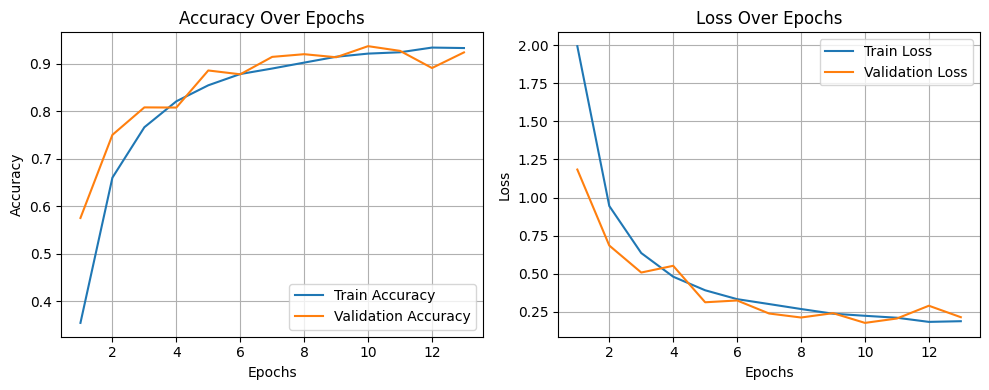

In [13]:
plot_history(history=history)

### Load in Cached Weights (only if they are not in memory)

In [14]:
trainer.load_checkpointed_weights('weights/best_model_checkpoint.pth')
trainer.batch_loaders()

Successfully loaded in weights from weights/best_model_checkpoint.pth.


### Evalaute Model on Val and Test Set 

In [15]:
val_stats = trainer.evaluate(loader_type='val')
models['MLP']['val_accuracy'] = val_stats['accuracy']

  0%|          | 0/272 [00:00<?, ?it/s]

In [16]:
test_stats = trainer.evaluate(loader_type='test')
models['MLP']['test_accuracy'] = test_stats['accuracy']

  0%|          | 0/272 [00:00<?, ?it/s]

### Get Full Classification Report

In [17]:
preds = preprocessor.label_encoder.inverse_transform(torch.cat([trainer.predict(x.reshape(1, -1)) for x in test_data[0]]).numpy())
truths = preprocessor.label_encoder.inverse_transform(test_data[-1])

In [18]:
report = classification_report(y_true=truths, y_pred=preds)
print(report)

              precision    recall  f1-score   support

           A       0.92      0.92      0.92       300
           B       0.97      0.94      0.95       300
           C       0.94      0.99      0.96       300
           D       0.93      0.95      0.94       300
           E       0.96      0.92      0.94       300
           F       0.94      0.97      0.95       300
           G       0.98      0.96      0.97       300
           H       0.97      0.97      0.97       300
           I       0.95      0.99      0.97       300
           J       0.94      0.98      0.96       300
           K       0.96      0.98      0.97       300
           L       0.97      0.93      0.95       300
           M       0.95      0.91      0.93       300
           N       0.95      0.99      0.97       300
           O       0.96      0.91      0.93       300
           P       0.99      0.99      0.99       300
           Q       1.00      0.99      0.99       300
           R       0.96    

### Make Predictions

In [19]:
def make_mlp_predictions(n_samples: int) -> None:
    """
    Function to make n random predictions from the test data.

    Args:
        n_samples (int): Number of random test predictions.
    """
    random_idxs = np.random.randint(0, len(test_data[0]), n_samples)
    trues = []
    preds = []
    for idx in random_idxs:
        X_test = test_data[0][idx].reshape(1, -1)
        y_true = test_data[-1][idx]
        pred = trainer.predict(X_test).item()
        preds.append(pred)
        trues.append(y_true)
        pred_label = preprocessor.label_encoder.inverse_transform([pred])
        true_label = preprocessor.label_encoder.inverse_transform([y_true])
        print(f'True: {true_label}, Pred: {pred_label}')
    print('*'*50)
    print(f'Accuracy for {n_samples} random test samples: {np.mean((np.array(trues).flatten() == np.array(preds).flatten()))}')


make_mlp_predictions(20)

True: ['P'], Pred: ['P']
True: ['M'], Pred: ['M']
True: ['N'], Pred: ['N']
True: ['R'], Pred: ['R']
True: ['L'], Pred: ['L']
True: ['N'], Pred: ['N']
True: ['B'], Pred: ['B']
True: ['N'], Pred: ['N']
True: ['I'], Pred: ['I']
True: ['U'], Pred: ['U']
True: ['I'], Pred: ['I']
True: ['del'], Pred: ['del']
True: ['N'], Pred: ['N']
True: ['S'], Pred: ['S']
True: ['L'], Pred: ['L']
True: ['G'], Pred: ['J']
True: ['nothing'], Pred: ['nothing']
True: ['L'], Pred: ['L']
True: ['del'], Pred: ['del']
True: ['M'], Pred: ['M']
**************************************************
Accuracy for 20 random test samples: 0.95


# Compare Models

In [27]:
models_df = pd.DataFrame(models) # Convert to df
models_df = models_df.apply(lambda x: round(x, 4)).T # Round and transpose
models_df.sort_values('test_accuracy', ascending=False, inplace=True) # Sort by test acc

# Highlight best model
top_model = models_df.index[0]
df_styled = models_df.style.apply(lambda row: ['background-color: green' if row.name == top_model else '' for _ in row], axis=1)
df_styled

,val_accuracy,test_accuracy
Random Forest,0.989200,0.987200
KNN,0.983300,0.979900
MLP,0.937200,0.936000
